<h1> Qu'est ce que le web scraping ? </h1>

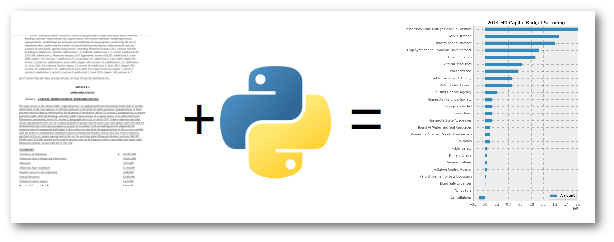

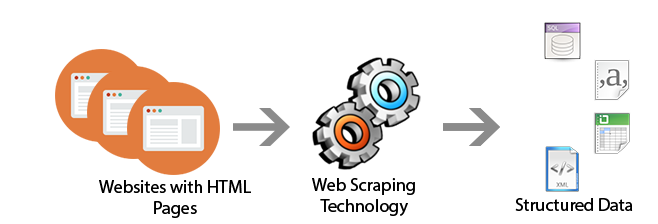

<h2> 1- Recuperer le code html d'une page </h2>

In [3]:
import requests
url = 'https://www.lemonde.fr/sport/article/2019/01/17/mondial-de-handball-deja-qualifiee-la-france-s-impose-sur-le-fil-face-a-la-russie_5410713_3242.html'

In [4]:
page = requests.get(url)
page

<Response [200]>

In [5]:
page.text
#ouvrez le code de la page avec f12

'         <!DOCTYPE html> <html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="UTF-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">    <script data-cmp="analytics" data-cmp-src="//www.lemonde.fr/bucket/64d2f130ed143cab21e4014252c9c4776f224ce1/js/chartbeatConfig.bundle.js" async="1"></script>    <link rel="manifest" href="/manifest.json">  <script>\nif(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&\'fonts\'in document){document.documentElement.classList.add(\'fonts-loaded\');}\nif(typeof Promise===\'undefined\'){document.documentElement.classList.add(\'fonts-loaded\');}</script>   <link rel="preload" href="/bucket/64d2f130ed143cab21e4014252c9c4776f224ce1/css/icons.css" as="style" onload="this.onload=null;this.rel=\'stylesheet\'"> <noscript><link rel="stylesheet" href="/bucket/64d2f130ed143cab21e4014252c9c4776f224ce1/css/icons.css"></noscript>   <link rel="preload" href

<html>
    <head>
        <title>Exemple d'une page html</title>
    </head>
    <body>
        <h1> Le titre de ma page </h1>
        <p>voici un paragraphe de notre page web</p>
        <a target='_blank' href='https://www.udemy.com/courses/search/?src=ukw&q=html' > si vous voulez apprendre le html css en détail </a>
    </body>
</html>

<h2>Recupérer des informations depuis une page web</h2> 

- request est limité , on va devoir utiliser une autre librairie

- <b>Beautiful Soup</b> est une bibliothèque Python pour extraire des données de fichiers HTML et XML. Il fonctionne avec votre analyseur favori pour fournir des moyens simplifiés de navigation, de recherche et de modification de l'arbre d'analyse. Il permet généralement aux programmeurs d'économiser des heures ou des jours de travail.

In [7]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.lemonde.fr/sport/article/2019/01/17/mondial-de-handball-deja-qualifiee-la-france-s-impose-sur-le-fil-face-a-la-russie_5410713_3242.html'
page = requests.get(url)

html = BeautifulSoup(page.text, 'html.parser')
html

 <!DOCTYPE html>
 <html lang="fr" prefix="og: http://ogp.me/ns#"> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/> <script async="1" data-cmp="analytics" data-cmp-src="//www.lemonde.fr/bucket/64d2f130ed143cab21e4014252c9c4776f224ce1/js/chartbeatConfig.bundle.js"></script> <link href="/manifest.json" rel="manifest"/> <script>
if(sessionStorage.fontsFirst&&sessionStorage.fontsLast&&'fonts'in document){document.documentElement.classList.add('fonts-loaded');}
if(typeof Promise==='undefined'){document.documentElement.classList.add('fonts-loaded');}</script> <link as="style" href="/bucket/64d2f130ed143cab21e4014252c9c4776f224ce1/css/icons.css" onload="this.onload=null;this.rel='stylesheet'" rel="preload"/> <noscript><link href="/bucket/64d2f130ed143cab21e4014252c9c4776f224ce1/css/icons.css" rel="stylesheet"/></noscript> <link as="style" href="/bucket/64d2f130ed143cab21

In [8]:
html.find('h1')
#trouver le titre de la page

<h1 class="article__title">Mondial de handball 2019 : déjà qualifiée, la France s’impose sur le fil face à la Russie</h1>

In [9]:
html.find('h1').getText()

'Mondial de handball 2019\xa0: déjà qualifiée, la France s’impose sur le fil face à la Russie'

In [10]:
html.find('body').getText()

'       Consulterle journal    Navigation       Le Monde - retour à la une       Se connecterSe connecter  S’abonner              À la une Retour à la page d’accueil du Monde    En continu   Actualités    En ce moment   Enquête féminicides   Coronavirus et pandémie de Covid-19   Mort de George Floyd   Déconfinement   Nos vies confinées   Elections américaines 2020   Climat   Syrie   Municipales 2020 : tous nos articles   Toute l’actualité en continu     Actualités    International   Politique   Société   Les Décodeurs   Sport   Planète   Sciences   M Campus   Le Monde Afrique   Pixels   Médias   Santé   Big Browser   Disparitions   Podcasts         Économie      Économie   Économie mondiale   Économie française   Emploi   Argent & placements   Tribunes éco   Cities   Le Club de l’économie              Économie  Article réservé à nos abonnés Crash économique sans précédent au Brésil, en pleine crise sanitaire et politique         Économie  Article réservé à nos abonnés 5G\xa0: le lance

In [12]:
html.find_all('p')

[<p>Consulter<br/>le journal</p>,
 <p class="article__title">Crash économique sans précédent au Brésil, en pleine crise sanitaire et politique</p>,
 <p class="article__title">5G : le lancement des enchères en France fixé à la fin septembre</p>,
 <p class="article__title">« Personne ne peut affirmer que le marché de la livraison de repas sera rentable un jour »</p>,
 <p class="article__title">« Il faut repenser l’intelligence artificielle et déterminer ce qui pourrait la rendre plus utile pour faire face à des situations analogues au Covid-19 »</p>,
 <p class="article__title">Il y a 31 ans, Tiananmen : aux origines du massacre</p>,
 <p class="article__title">Il y a 76 ans, le Débarquement de Normandie : de l’exploit militaire au mythe américain</p>,
 <p class="article__title">Donald Trump et le racisme : une arme politique dangereuse</p>,
 <p class="article__title">Le coronavirus est-il sorti d’un laboratoire ? Episode 2 : la thèse de l’accident</p>,
 <p class="article__title">Ivan Kras

In [17]:
#objectif : récuperer les articles des plus lus
html.find_all('a')

[<a class="Header__jelec" data-target="jelec-header" href="https://journal.lemonde.fr" id="jelec_link" rel="noopener" style=" background-image: url('/thumbnail/journal/20200612/276/201'); " target="_blank"> <p>Consulter<br/>le journal</p> </a>,
 <a href="/"> <div class="logo__lemonde logo--full"></div> <span class="sr-only">Le Monde - retour à la une</span> </a>,
 <a class="js-header-login" href="https://secure.lemonde.fr/sfuser/connexion"> <span class="icon__nav-connexion"><span class="sr-only">Se connecter</span></span><span class="login-info">Se connecter</span> </a>,
 <a class="btn btn--premium" href="https://abo.lemonde.fr/#xtor=CS1-454[CTA_LMFR]-[HEADER]-54-[Article]" rel="nofollow">S’abonner</a>,
 <a class="Burger__right-arrow" data-target="a-la-une" href="/"> <span class="icon__home"></span> <span class="js-burger-to-show">À la une</span> <span class="sr-only">Retour à la page d’accueil du Monde</span> </a>,
 <a class="Burger__right-arrow" data-lazyload="0" data-target="en-con

In [34]:
html.find_all('ul',{'class':'fw_0_tops-articles'})

[]

In [35]:
topArticles = html.find_all('span',{'class':'insert__subtitle'})
topArticlesClean = [x.getText() for x in topArticles]
topArticlesClean

[]